# **Project - 2**
## **Emotion Recognition**

### **DESCRIPTION**

Future customizations, such as understanding human emotions, could lead to a range of advancements, such as determining whether a person likes a specific statement, item or product, food, or how they are feeling in a particular circumstance, and so on. 

 

### **Objective:**

To build a model using a convolutional neural network that can classify a person's emotion

 

#### Dataset description:

The dataset contains two folders named Train and Test. These folders have approximately 35,000 images of seven different human emotions, such as anger, disgust, fear, happiness, neutral, sadness, and surprise.

 

**Train folder**: This folder has images for training the model, which is divided into subfolders having the same name as the class. 

**Test folder**: This folder has images for testing the model, which is divided into subfolders having the same name as the class.


**Following operations should be performed using KERAS**
1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.8.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Facial Expression/Data.zip', '/content/')

2. Plot sample images for all the classes

In [4]:
def plot_example_images(plt):
    img_size = 48
    plt.figure(0, figsize=(12,20))
    ctr = 0
    for expression in os.listdir('Data/train'):
        for i in range(1,6):
            ctr += 1
            plt.subplot(7,5,ctr)
            img = load_img(os.getcwd()+"/Data/train/" + expression + "/" +os.listdir("Data/train/" + expression)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

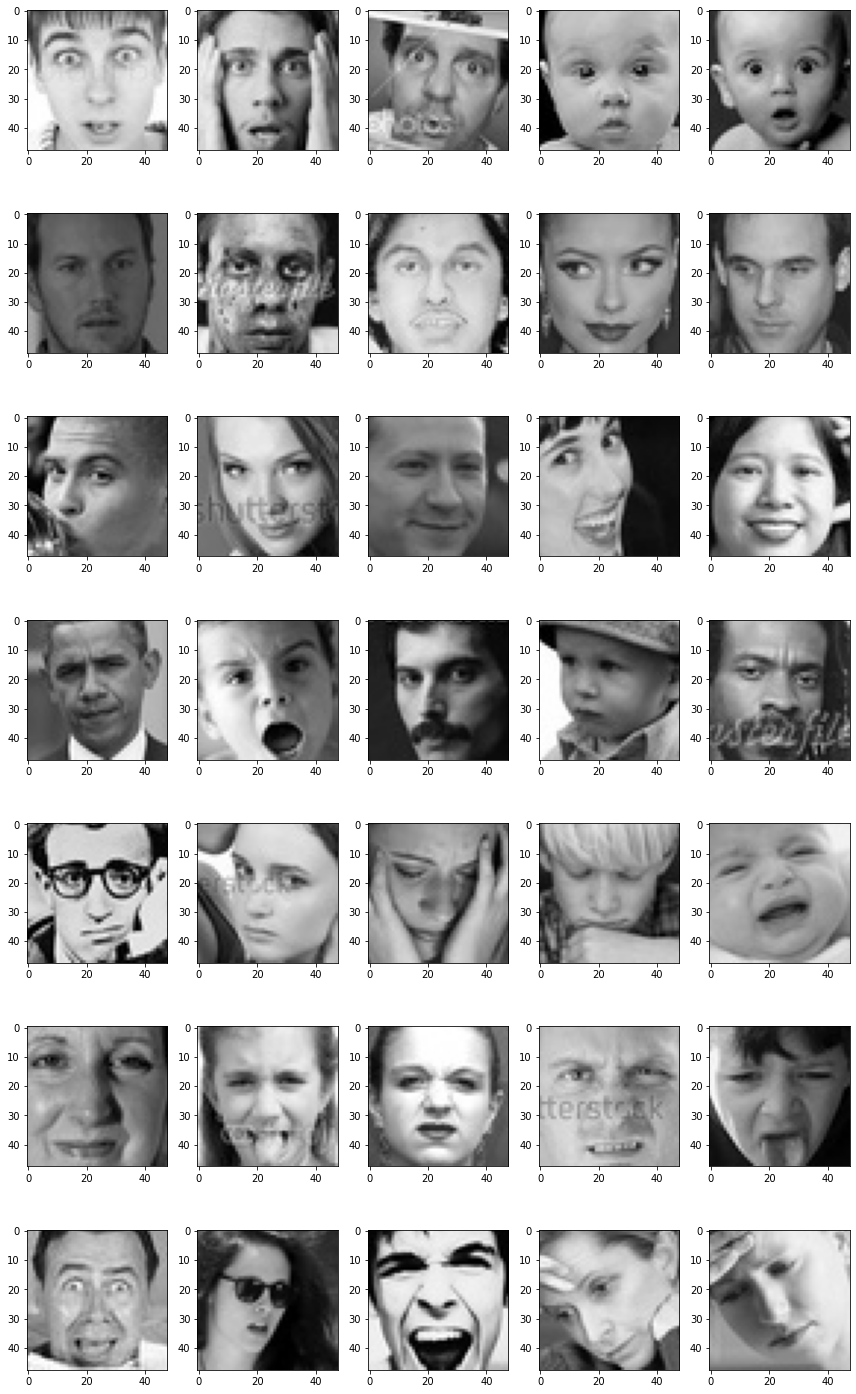

In [5]:
plot_example_images(plt)

3. Plot the bar graph for the number of images in each class for both training and testing data

In [6]:
df = {}
for expression in os.listdir('Data/train'):
    directory = "Data/train/" + expression
    df[expression] = len(os.listdir(directory))
df = pd.DataFrame(df, index=[0])

In [7]:
pd.options.plotting.backend = "plotly"
fig = df.transpose().plot.bar()
fig.show()

4. Build a data augmentation for train data and Test to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

In [8]:
img_size = 48
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory('/content/Data/train', target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

test_generator = test_datagen.flow_from_directory('/content/Data/test', target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
! pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 20.5 MB/s 
     |████████████████████████████████| 381 kB 66.0 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [10]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D, PReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from livelossplot import PlotLossesKerasTF



### **Build 3 CNN model with:**
**1. CNN Architecture:**
*  Add convolutional layers, max pool layers, dropout layers, batch normalization layers  

*  Use Relu as activation functions

*  Take loss function as categorical cross-entropy

*  Take Adam as an optimizer

*  Use early-stop with two patients and monitor for validation loss

*  Try with ten number epochs

*  Train the model using the generator and test the accuracy of the test data at every epoch

*  Plot the training and validation accuracy, and the loss

*  Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding='same',
                           input_shape=(48, 48, 1),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (5, 5), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(512, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(512, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation='softmax')])

model.summary()



# Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy',Precision(), Recall()])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 p_re_lu_6 (PReLU)           (None, 48, 48, 64)        147456    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_7 (Batc  (None, 24, 24, 128)     

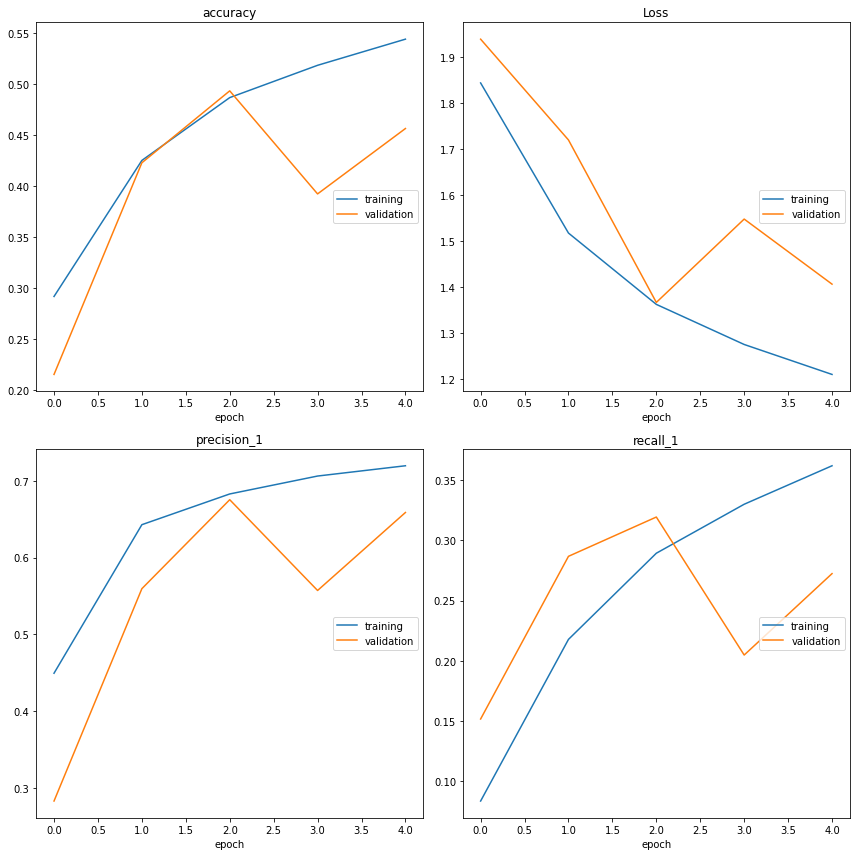

accuracy
	training         	 (min:    0.291, max:    0.544, cur:    0.544)
	validation       	 (min:    0.215, max:    0.493, cur:    0.456)
Loss
	training         	 (min:    1.210, max:    1.844, cur:    1.210)
	validation       	 (min:    1.367, max:    1.939, cur:    1.407)
precision_1
	training         	 (min:    0.449, max:    0.720, cur:    0.720)
	validation       	 (min:    0.283, max:    0.675, cur:    0.659)
recall_1
	training         	 (min:    0.083, max:    0.362, cur:    0.362)
	validation       	 (min:    0.152, max:    0.319, cur:    0.272)

Epoch 5: saving model to model_weights.h5

Epoch 5: val_loss did not improve from 1.36703
Restoring model weights from the end of the best epoch: 3.
448/448 [==============================] - 27s 61ms/step - loss: 1.2104 - accuracy: 0.5440 - precision_1: 0.7195 - recall_1: 0.3621 - val_loss: 1.4068 - val_accuracy: 0.4563 - val_precision_1: 0.6587 - val_recall_1: 0.2725 - lr: 0.0010
Epoch 5: early stopping


In [28]:
epochs = 10
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                            save_weights_only = True,
                            mode = 'max',
                            verbose = 1)

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 2,
                          mode = 'max',
                          verbose = 1,
                          restore_best_weights = True)

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint("model.h5", monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [PlotLossesKerasTF(),checkpoint, lr_reducer, checkpointer, earlystop]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = test_generator,
    validation_steps = validation_steps,
    callbacks=callbacks)

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [30]:
img = cv2.imread('/content/drive/MyDrive/Facial Expression/9.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48,48))

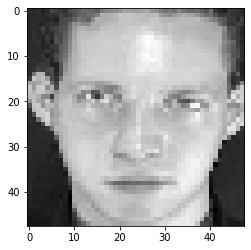

In [31]:
plt.imshow(img,cmap = 'gray')

In [32]:

img = np.expand_dims(img,axis = 2)

img.shape


(48, 48, 1)

In [33]:
preds = model.predict(img)
preds.max()
np.argmax(preds)

5

In [34]:
list(train_generator.class_indices)[np.argmax(preds)]

'sad'

### **2. Customized CNN Architecture:**
*   Add convolutional layers, max pool layers, dropout layers, batch normalization layers on the top of the first model architecture to improve the accuracy

*   Change the batch size activation function and optimizer as rmsprop and observe if the accuracy increases

*   Take the loss function as categorical cross-entropy

*   Use early stopping with the patience of two epochs and monitoring of validation loss

*   Try with ten number epochs

*   Train the model using the generator and test the accuracy of the test data at every epoch

*   Plot the training and validation accuracy, and the loss

*   Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good


In [35]:
len(model.layers)

26

In [36]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/model.h5')

In [37]:
model.layers

In [39]:
last_layer = model.output

x = Flatten()(last_layer)

x = Dense(units=2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(units=2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(units=4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(units=7, activation='softmax')(x)

# prevent the weights from being updated during training
model.trainable = False
Cust_CNN = Model(inputs=model.input, outputs=x)
Cust_CNN.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 48, 48, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 p_re_lu_6 (PReLU)           (None, 48, 48, 64)        147456    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       2049

In [40]:
len(Cust_CNN.layers)

38

In [41]:


# Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
Cust_CNN.compile(optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy',Precision(), Recall()])




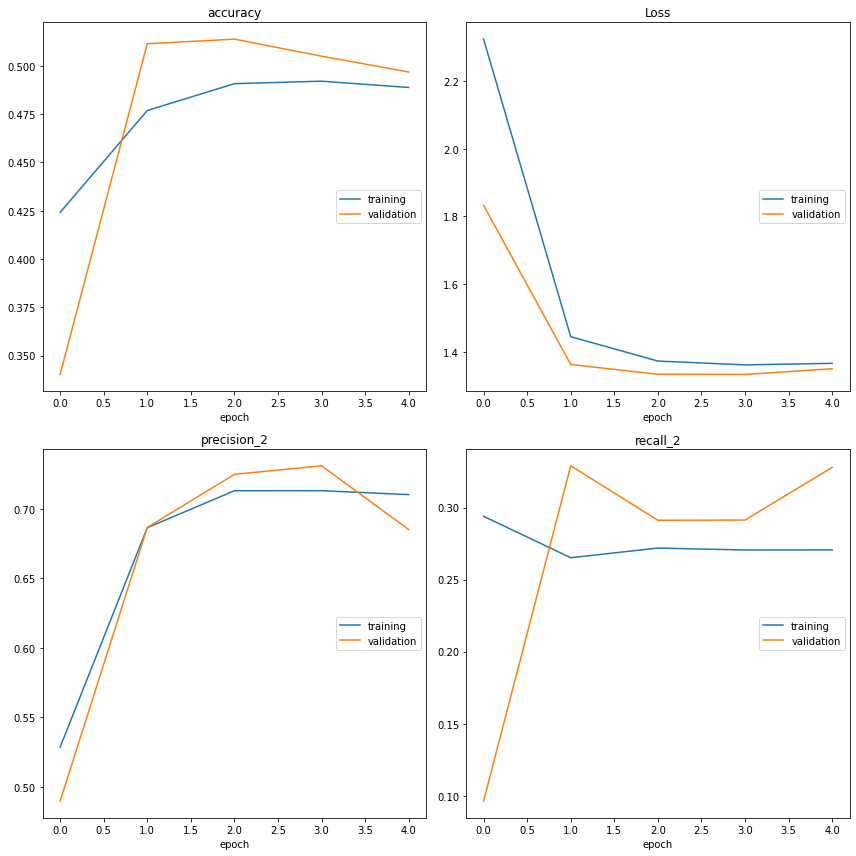

accuracy
	training         	 (min:    0.424, max:    0.492, cur:    0.489)
	validation       	 (min:    0.340, max:    0.514, cur:    0.497)
Loss
	training         	 (min:    1.361, max:    2.324, cur:    1.366)
	validation       	 (min:    1.333, max:    1.833, cur:    1.350)
precision_2
	training         	 (min:    0.528, max:    0.713, cur:    0.710)
	validation       	 (min:    0.490, max:    0.731, cur:    0.685)
recall_2
	training         	 (min:    0.265, max:    0.294, cur:    0.271)
	validation       	 (min:    0.096, max:    0.329, cur:    0.328)

Epoch 5: saving model to Custom_CNN_weights.h5

Epoch 5: val_loss did not improve from 1.33309
Restoring model weights from the end of the best epoch: 3.
448/448 [==============================] - 23s 51ms/step - loss: 1.3658 - accuracy: 0.4888 - precision_2: 0.7103 - recall_2: 0.2706 - val_loss: 1.3500 - val_accuracy: 0.4968 - val_precision_2: 0.6851 - val_recall_2: 0.3278 - lr: 0.0100
Epoch 5: early stopping


In [42]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint("Custom_CNN_weights.h5", monitor='val_accuracy',
                            save_weights_only = True,
                            mode = 'max',
                            verbose = 1)

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 2,
                          mode = 'max',
                          verbose = 1,
                          restore_best_weights = True)

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint("Cust_CNN.h5", monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [PlotLossesKerasTF(),checkpoint, lr_reducer, checkpointer, earlystop]

history = Cust_CNN.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = test_generator,
    validation_steps = validation_steps,
    callbacks=callbacks)

5

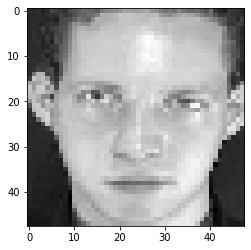

In [45]:
img = cv2.imread('/content/drive/MyDrive/Facial Expression/9.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48,48))
plt.imshow(img,cmap = 'gray')

img = np.expand_dims(img,axis = 2)

img.shape

preds = model.predict(img)
preds.max()
np.argmax(preds)



In [46]:
list(train_generator.class_indices)[np.argmax(preds)]

'sad'

# Transfer Learning

1. Prepare the data for the transfer learning algorithm

2. Freeze the top layers of the pre-trained model

3. Add a dense layer at the end of the pre-trained model   followed by a dropout layer

4. Add the final output layer with the SoftMax activation function

5. Take the loss function as categorical cross-entropy

6. Take Adam as an optimizer

7. Use early stopping with the patience of two epochs and monitor the validation loss which is set as minimum mode

8. Try with fifteen number epochs

9. Train the model using the generator and test the accuracy of the test data at every epoch

10. Plot the training and validation accuracy, and the loss

11. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [47]:
import tensorflow as tf

In [48]:
#vgg16
#Step1: Create image generator object

generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [49]:
#step 2: create train and validation object
train_generator = generator.flow_from_directory('/content/Data/train',
                              target_size=[48, 48],
                              class_mode="categorical",
                              batch_size=64)

Found 28709 images belonging to 7 classes.


In [50]:
#step 2: create train and validation object
validation_generator = generator.flow_from_directory('/content/Data/test',
                              target_size=[48, 48],
                              class_mode="categorical",
                              batch_size=64)

Found 7178 images belonging to 7 classes.


In [51]:
vgg = tf.keras.applications.vgg16.VGG16(weights='imagenet',include_top= False) 

input_tensor = Input(shape=(48,48,1) )
x = Conv2D(3,(3,3),padding='same')(input_tensor)    # x has a dimension of (IMG_SIZE,IMG_SIZE,3)
out = vgg(x) 

vgg1 = Model(inputs=input_tensor,outputs=out)

58900480/58889256 [==============================] - 1s 0us/step


In [52]:
vgg1.layers

In [53]:
for layer in vgg1.layers:
  layer.trainable = False

In [54]:
# Step4: Create FC layer
flatten = tf.keras.layers.Flatten()
hidd1 = tf.keras.layers.Dense(150, activation="relu")
bath_norm1 = BatchNormalization()
drop1 = Dropout(0.2)

hidd2 = tf.keras.layers.Dense(300, activation="relu")
bath_norm2 = BatchNormalization()
drop2 = Dropout(0.2)

hidd3 = tf.keras.layers.Dense(450, activation="relu")
bath_norm3 = BatchNormalization()
drop1 = Dropout(0.2)

hidd4 = tf.keras.layers.Dense(900, activation="relu")
bath_norm4 = BatchNormalization()
drop4 = Dropout(0.2)

hidd5 = tf.keras.layers.Dense(2048, activation="relu")
bath_norm5 = BatchNormalization()
drop5 = Dropout(0.2)

final_layer = tf.keras.layers.Dense(7, activation="softmax")

In [55]:
Transfer_model = tf.keras.models.Sequential([vgg1,
                            flatten,
                            hidd1,
                            bath_norm1,
                            drop1,
                            hidd2,
                            bath_norm2,
                            drop2,
                            hidd3,
                            bath_norm3,
                            drop1,
                            hidd4,
                            bath_norm4,
                            drop4,
                            hidd5,
                            bath_norm5,
                            drop5,
                            final_layer
                            ])

In [56]:
Transfer_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 1, 1, 512)         14714718  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 150)               76950     
                                                                 
 batch_normalization_18 (Bat  (None, 150)              600       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        multiple                  0         
                                                                 
 dense_15 (Dense)            (None, 300)               45300     
                                                      

In [59]:
# Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
Transfer_model.compile(optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy',Precision(), Recall()])

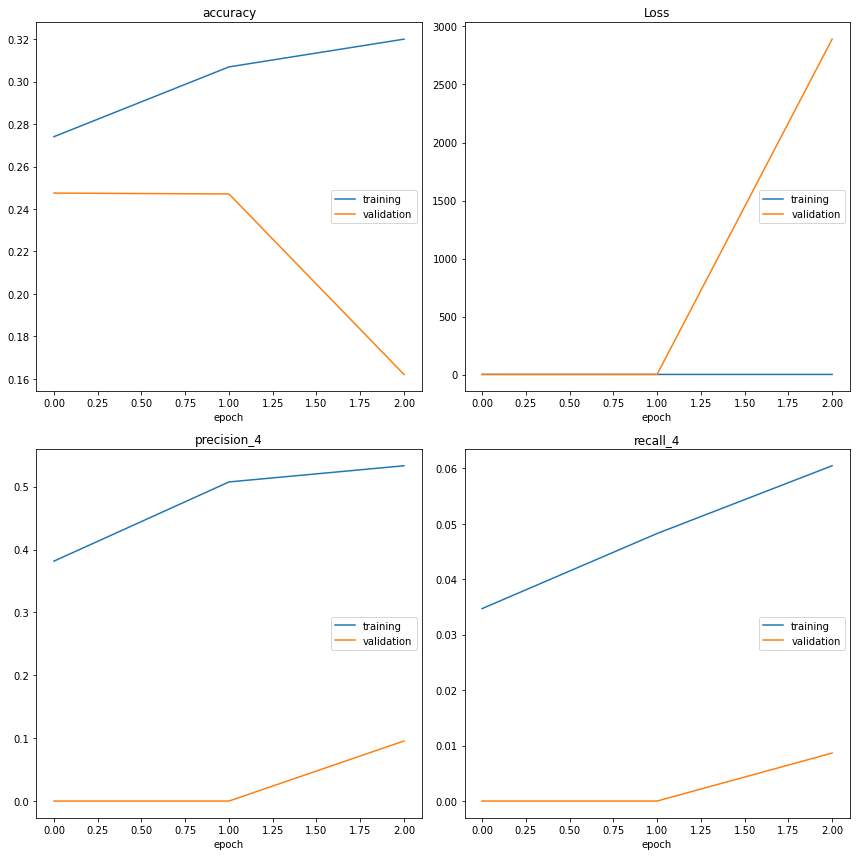

accuracy
	training         	 (min:    0.274, max:    0.320, cur:    0.320)
	validation       	 (min:    0.162, max:    0.247, cur:    0.162)
Loss
	training         	 (min:    1.709, max:    1.985, cur:    1.709)
	validation       	 (min:    1.928, max: 2890.404, cur: 2890.404)
precision_4
	training         	 (min:    0.382, max:    0.533, cur:    0.533)
	validation       	 (min:    0.000, max:    0.096, cur:    0.096)
recall_4
	training         	 (min:    0.035, max:    0.060, cur:    0.060)
	validation       	 (min:    0.000, max:    0.009, cur:    0.009)

Epoch 3: saving model to Transfer_model_weights.h5

Epoch 3: val_loss did not improve from 1.92821
Restoring model weights from the end of the best epoch: 1.
448/448 [==============================] - 19s 42ms/step - loss: 1.7095 - accuracy: 0.3200 - precision_4: 0.5333 - recall_4: 0.0605 - val_loss: 2890.4041 - val_accuracy: 0.1621 - val_precision_4: 0.0955 - val_recall_4: 0.0086 - lr: 0.0100
Epoch 3: early stopping


In [60]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint("Transfer_model_weights.h5", monitor='val_accuracy',
                            save_weights_only = True,
                            mode = 'max',
                            verbose = 1)

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 2,
                          mode = 'max',
                          verbose = 1,
                          restore_best_weights = True)

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint("Transfer_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [PlotLossesKerasTF(),checkpoint, lr_reducer, checkpointer, earlystop]

history = Transfer_model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = test_generator,
    validation_steps = validation_steps,
    callbacks=callbacks)

(48, 48, 1)

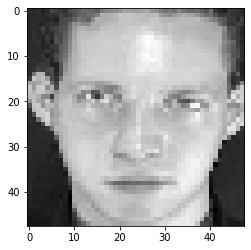

In [73]:
img = cv2.imread('/content/drive/MyDrive/Facial Expression/9.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48,48))
plt.imshow(img,cmap = 'gray')

img = np.expand_dims(img,axis = 2)

img.shape


In [74]:
prediction = model.predict(img)

In [75]:
list(train_generator.class_indices)[np.argmax(prediction)]

'sad'

**Model performance as below**
1. **CNN model** -
      *  **accuracy**
       * training      	 (min:    0.291, max:    **0.544**, cur:    0.544)

       * validation      	 (min:    0.215, max:    **0.493**, cur:    0.456)

      * **precision_1**
       * training        	 (min:    0.449, max:    **0.720**, cur:    0.720)
       * validation      	 (min:    0.283, max:    **0.675**, cur:    0.659)
      * **recall_1**
       * training         	 (min:    0.083, max:    **0.362**, cur:    0.362)
       * validation       	 (min:    0.152, max:    **0.319**, cur:    0.272)

2. **Customized CNN model**- 
      * **accuracy**
	      * training         	 (min:    0.424, max:    **0.492**, cur:    0.489)
	      * validation       	 (min:    0.340, max:    **0.514**, cur:    0.497)

      * **precision_2**
	      * training         	 (min:    0.528, max:    **0.713**, cur:    0.710)
	      * validation       	 (min:    0.490, max:    **0.731**, cur:    0.685)

      * **recall_2**
	      * training         	 (min:    0.265, max:    **0.294**, cur:    0.271)
	      * validation       	 (min:    0.096, max:    **0.329**, cur:    0.328)

3. **Transfer Learning Model**
      * **accuracy**
	      * training         	 (min:    0.274, max:    **0.320**, cur:    0.320)
	      * validation       	 (min:    0.162, max:    **0.247**, cur:    0.162)

      * **precision_4**
	      * training         	 (min:    0.382, max:    **0.533**, cur:    0.533)
	      * validation       	 (min:    0.000, max:    **0.096**, cur:    0.096)
      * recall_4
	      * training         	 (min:    0.035, max:    **0.060**, cur:    0.060)
	      * validation       	 (min:    0.000, max:    **0.009**, cur:    0.009)

### **From the above models best model is CNN model**

**Write at least 3 more things to increase the model’s performance**

1. Model performance is increases as the number of layer are less for this case study.

2. Model perfomance is increases as the introducing drop out layer to taken care the overfitting of model

3. Model performance is inceases as Adom optiimizer is used instead of other optimizer